In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("data_before_forest.csv")

# Convert categorical target variable "owners" into numerical labels
df["owners"] = df["owners"].astype("category").cat.codes  # Encodes categories as integers

# Separate features (X) and target (y)
X = df.drop(columns=["owners"])
y = df["owners"]

# Combine X and y for sampling
df_combined = pd.concat([X, y], axis=1)

# Find the most frequent category
category_counts = df_combined["owners"].value_counts()
most_frequent_category = category_counts.idxmax()  # Get the category with the most observations
original_size = category_counts.max()  # Original size of the most frequent category

# Compute the target size (1/7 of the original size)
target_size = int(original_size / 7)

# Downsample the most frequent category
df_majority = df_combined[df_combined["owners"] == most_frequent_category]
df_majority_downsampled = df_majority.sample(n=target_size, random_state=42)

# Keep all other categories as they are
df_minority = df_combined[df_combined["owners"] != most_frequent_category]

# Concatenate the downsampled majority class with other categories
df_balanced = pd.concat([df_majority_downsampled, df_minority], axis=0)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate back into features (X) and target (y)
X_balanced = df_balanced.drop(columns=["owners"])
y_balanced = df_balanced["owners"]

# Print new category distribution
print("✅ New Category Distribution:\n", y_balanced.value_counts())

# Save the balanced dataset
df_balanced.to_csv("data_balanced.csv", index=False)
print("✅ Balanced dataset saved as 'data_balanced.csv'")

✅ New Category Distribution:
 owners
4    6176
0    5200
3    3626
2    2511
1    1846
Name: count, dtype: int64
✅ Balanced dataset saved as 'data_balanced.csv'


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
# Load dataset
df = pd.read_csv("data_balanced.csv")

# Drop unnecessary columns
df = df.drop(columns=["appid", "n_owners", "average_forever"])

# Convert categorical target variable "owners" into numerical labels
df["owners"] = df["owners"].astype("category").cat.codes  # Encodes categories as integers

# Separate features (X) and target (y)
X = df.drop(columns=["owners"])
y = df["owners"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=42)

In [31]:
# Compute feature importances using Random Forest
rf_feature_importance = RandomForestClassifier(n_estimators=500, random_state=42)
rf_feature_importance.fit(X, y)

RandomForestClassifier(n_estimators=500, random_state=42)

In [32]:
# Sort feature importances
feature_importances = pd.Series(rf_feature_importance.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top features
top_features = {
    15: feature_importances[:15].index.tolist(),
    30: feature_importances[:30].index.tolist(),
    40: feature_importances[:40].index.tolist()
}

In [33]:
from collections import Counter

# Function to compare actual vs. predicted class distribution
def compare_class_distributions(y_actual, y_pred, model_name, num_features):
    # Count class occurrences
    actual_counts = Counter(y_actual)
    predicted_counts = Counter(y_pred)
    
    # Convert to percentages
    actual_ratios = {k: v / len(y_actual) * 100 for k, v in actual_counts.items()}
    predicted_ratios = {k: v / len(y_pred) * 100 for k, v in predicted_counts.items()}
    
    # Convert to DataFrame for visualization
    class_distribution_df = pd.DataFrame({
        "Actual (%)": actual_ratios,
        "Predicted (%)": predicted_ratios
    }).fillna(0)  # Fill missing categories with 0

    print(f"\n🔹 Class Distribution for {model_name} (Top {num_features} Features):")
    print(class_distribution_df)

    # Plot class distribution
    class_distribution_df.plot(kind="bar", figsize=(8, 5), title=f"Class Distribution - {model_name} (Top {num_features})")
    plt.ylabel("Percentage (%)")
    plt.xlabel("Class Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


 - Training models with Top 15 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:38:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy (Top 15): 0.4316
XGBoost Accuracy (Top 15): 0.4370

🔹 Class Distribution for Random Forest (Top 15 Features):
   Actual (%)  Predicted (%)
0   26.859504      32.722107
1    9.529959       5.423554
2   12.964876       9.116736
4   31.921488      36.234504
3   18.724174      16.503099


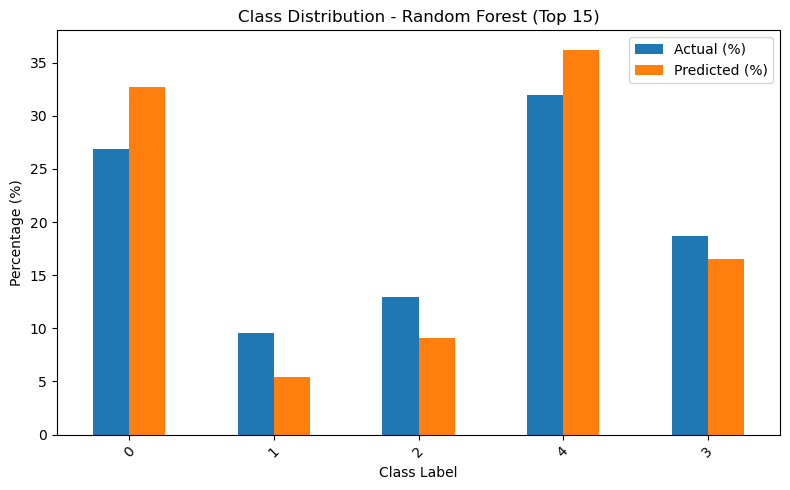


🔹 Class Distribution for XGBoost (Top 15 Features):
   Actual (%)  Predicted (%)
0   26.859504      33.032025
1    9.529959       7.153926
2   12.964876       9.762397
4   31.921488      35.072314
3   18.724174      14.979339


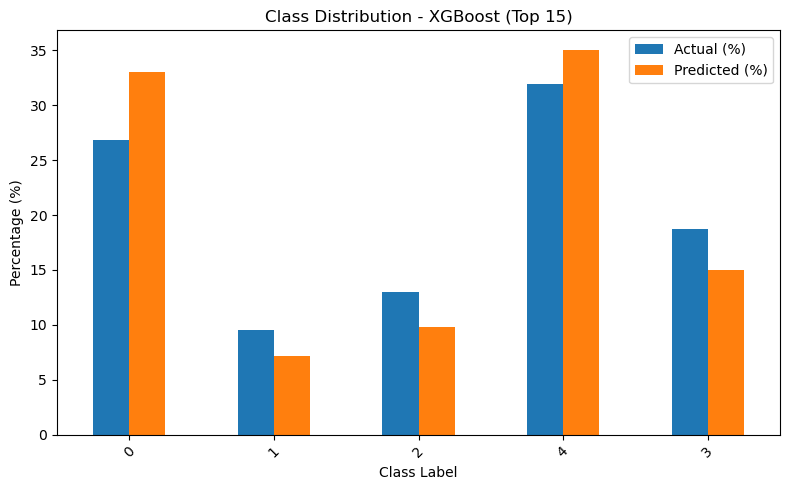


 - Training models with Top 30 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:38:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy (Top 30): 0.4551
XGBoost Accuracy (Top 30): 0.4473

🔹 Class Distribution for Random Forest (Top 30 Features):
   Actual (%)  Predicted (%)
0   26.859504      33.290289
1    9.529959       5.268595
2   12.964876       8.316116
4   31.921488      36.363636
3   18.724174      16.761364


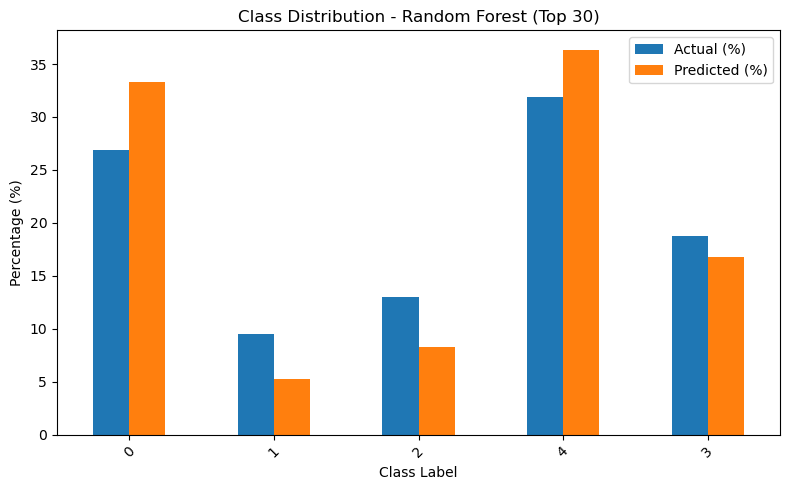


🔹 Class Distribution for XGBoost (Top 30 Features):
   Actual (%)  Predicted (%)
0   26.859504      32.747934
1    9.529959       6.947314
2   12.964876      10.175620
4   31.921488      35.020661
3   18.724174      15.108471


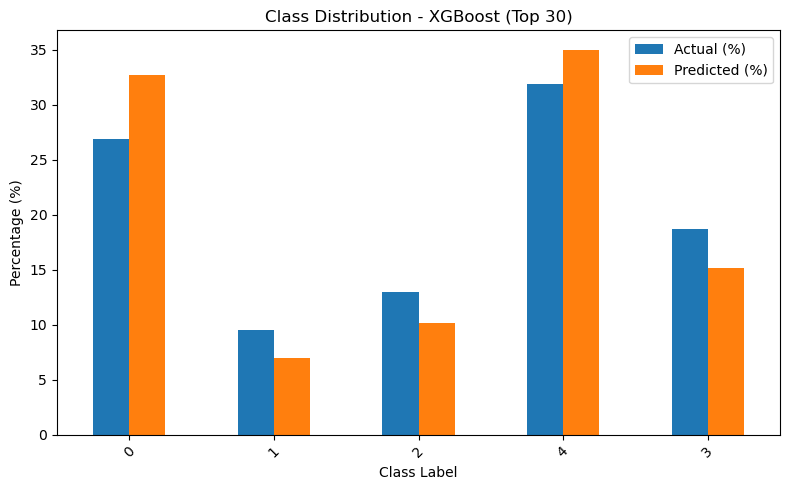


 - Training models with Top 40 Features


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:39:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy (Top 40): 0.4514
XGBoost Accuracy (Top 40): 0.4512

🔹 Class Distribution for Random Forest (Top 40 Features):
   Actual (%)  Predicted (%)
0   26.859504      33.161157
1    9.529959       4.571281
2   12.964876       8.316116
4   31.921488      37.629132
3   18.724174      16.322314


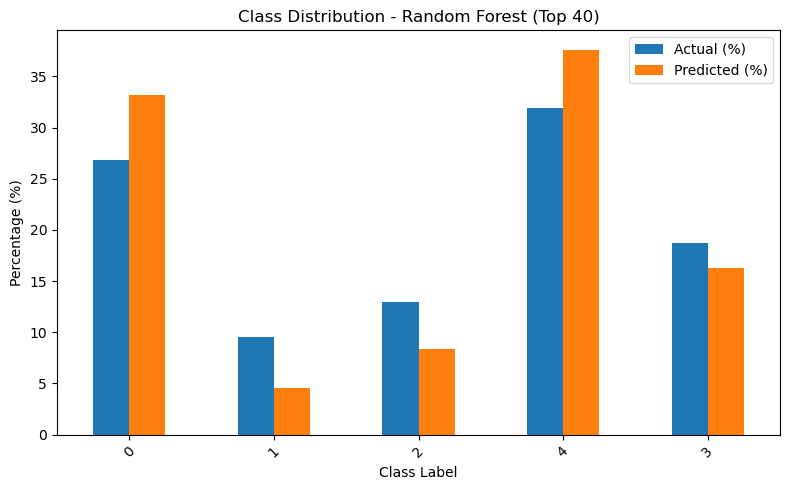


🔹 Class Distribution for XGBoost (Top 40 Features):
   Actual (%)  Predicted (%)
0   26.859504      32.386364
1    9.529959       6.818182
2   12.964876       9.943182
4   31.921488      35.769628
3   18.724174      15.082645


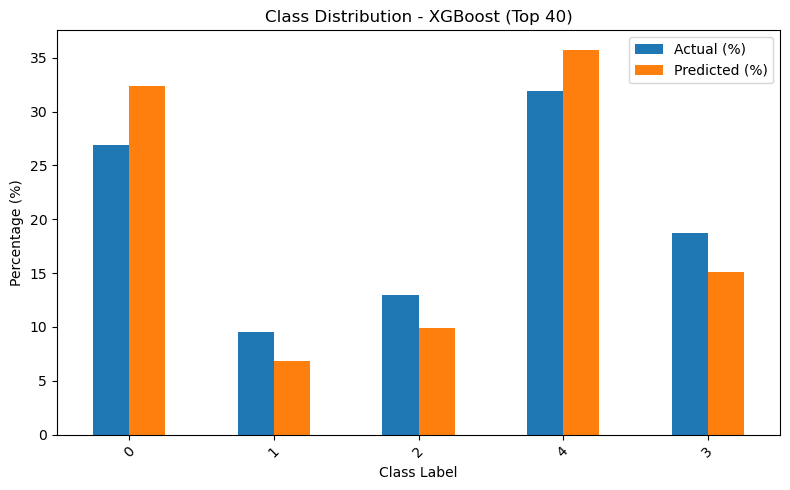

In [34]:
# Initialize results dictionary
results = {}

# Train and evaluate models for different feature sets
for num_features, features in top_features.items():
    print(f"\n - Training models with Top {num_features} Features")

    # Select subset of features
    X_subset = X[features]

    # Split data into training and testing sets (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42, stratify=y)

    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, min_samples_split=5, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Train XGBoost Model
    xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)

    # Evaluate Models
    rf_accuracy = accuracy_score(y_test, rf_pred)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)

    print(f"Random Forest Accuracy (Top {num_features}): {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy (Top {num_features}): {xgb_accuracy:.4f}")

    # Store results
    results[num_features] = {
        "RF Accuracy": rf_accuracy,
        "XGB Accuracy": xgb_accuracy,
        "RF Report": classification_report(y_test, rf_pred, output_dict=True),
        "XGB Report": classification_report(y_test, xgb_pred, output_dict=True)
    }

    # Compare actual vs. predicted distributions
    compare_class_distributions(y_test, rf_pred, model_name="Random Forest", num_features=num_features)
    compare_class_distributions(y_test, xgb_pred, model_name="XGBoost", num_features=num_features)
